# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [147]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [102]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv('api.env')

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [103]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [104]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [105]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [106]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent= 3, sort_keys= True))


{
   "data": {
      "1": {
         "circulating_supply": 19350337,
         "id": 1,
         "last_updated": 1681873786,
         "max_supply": 21000000,
         "name": "Bitcoin",
         "quotes": {
            "USD": {
               "market_cap": 584792691983,
               "percent_change_1h": -0.0814935963629581,
               "percent_change_24h": 2.38460564724969,
               "percent_change_7d": -0.216967850778626,
               "percentage_change_1h": -0.0814935963629581,
               "percentage_change_24h": 2.38460564724969,
               "percentage_change_7d": -0.216967850778626,
               "price": 30195.0,
               "volume_24h": 17935564929
            }
         },
         "rank": 1,
         "symbol": "BTC",
         "total_supply": 19350337,
         "website_slug": "bitcoin"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3119,
      "timestamp": 1681873786
   }
}


In [107]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent= 3, sort_keys= True))


{
   "data": {
      "1027": {
         "circulating_supply": 119368246,
         "id": 1027,
         "last_updated": 1681873793,
         "max_supply": 119368246,
         "name": "Ethereum",
         "quotes": {
            "USD": {
               "market_cap": 249962493723,
               "percent_change_1h": -0.0590820104349948,
               "percent_change_24h": 0.48461505561252,
               "percent_change_7d": 10.5381412291465,
               "percentage_change_1h": -0.0590820104349948,
               "percentage_change_24h": 0.48461505561252,
               "percentage_change_7d": 10.5381412291465,
               "price": 2092.42,
               "volume_24h": 9740802048
            }
         },
         "rank": 2,
         "symbol": "ETH",
         "total_supply": 119368246,
         "website_slug": "ethereum"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3119,
      "timestamp": 1681873793
   }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [108]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']["USD"]["price"]

# Print the current price of BTC
print(f'The price of bitcoin is: {btc_price}')


The price of bitcoin is: 30195.0


In [109]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']["USD"]["price"]

# Print the current price of ETH
print(f'The price of Ethereum is: {btc_price}')


The price of Ethereum is: 30195.0


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [110]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f'The value of bitcoin in the wallet is: {btc_value}')


The value of bitcoin in the wallet is: 36234.0


In [111]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f'The value of ethereum in the wallet is: {eth_value}')


The value of ethereum in the wallet is: 11089.826


In [112]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = eth_value + btc_value

# Print current cryptocurrency wallet balance
print(f'The value of the wallet is: {total_crypto_wallet}')


The value of the wallet is: 47323.826


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [113]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [114]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
alpaca_api_key,
alpaca_secret_key,
api_version= "V2")

str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [115]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe= '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2023-04-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-04-17", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [116]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
Alpaca_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = Alpaca_df[Alpaca_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = Alpaca_df[Alpaca_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
Alpaca_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
display(Alpaca_df.head())
display(Alpaca_df.dtypes)


SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2023-04-17 04:00:00+00:00  412.37  413.96  411.085  413.94  64863629   

                                                    AGG                       \
                          trade_count       vwap   open    high    low close   
timestamp                                                                      
2023-04-17 04:00:00+00:00      465564  412.59434  99.13  99.175  98.88  98.9   

                                                           
                            volume trade_count       vwap  
timestamp                                                  
2023-04-17 04:00:00+00:00  4417660       18342  98.943593

SPY  open           float64
     high           float64
     low            float64
     close          float64
     volume           int64
     trade_count      int64
     vwap           float64
AGG  open           float64
     high           float64
     low            float64
     close          float64
     volume           int64
     trade_count      int64
     vwap           float64
dtype: object

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [117]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(Alpaca_df["AGG"]["close"])

# Print the AGG closing price
print(f'The closing price of AGG is: {agg_close_price}')


The closing price of AGG is: 98.9


In [118]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(Alpaca_df["SPY"]["close"])

# Print the SPY closing price
print(f'The closing price of AGG is: {spy_close_price}')


The closing price of AGG is: 413.94


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [119]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f'The current value of the bond portfolio is: {agg_value}')


The current value of the bond portfolio is: 19780.0


In [120]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f'The current value of the stock portfolio is: {spy_value}')


The current value of the stock portfolio is: 45533.4


In [121]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'The current value of the stock and bond portfolio is: {total_stocks_bonds}')


The current value of the stock and bond portfolio is: 65313.4


In [122]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f'The current value of the total portfolio is: {total_portfolio}')


The current value of the total portfolio is: 112637.226


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [123]:
# Consolidate financial assets data into a Python list
savings_data = [total_stocks_bonds, total_crypto_wallet]

# Review the Python list savings_data
savings_data
    

[65313.4, 47323.826]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [124]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    {"Amount": savings_data},
    index= ['Crypto', 'Stock/Bond']
)

# Display the savings_df DataFrame
savings_df


,Amount
Crypto,65313.400
Stock/Bond,47323.826


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Holdings'}, ylabel='Amount'>

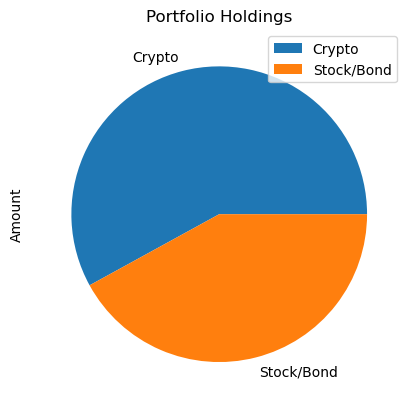

In [125]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot(kind='pie', y='Amount', title= 'Portfolio Holdings')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [126]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [127]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have enough money in this fund.")
elif total_portfolio == emergency_fund_value:
    print("Congratulations! You have reached the important financial goal of having 3 month emergency fund reserve")
elif total_portfolio < emergency_fund_value:
    print(f"Sorry, you need ${emergency_fund_value-total_portfolio} to reach your goal")


Congratulations! You have enough money in this fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [128]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2020-04-17", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-04-17", tz="America/New_York").isoformat()

In [129]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
Montecarlo_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = Montecarlo_df[Montecarlo_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = Montecarlo_df[Montecarlo_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
Montecarlo_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame
display(Montecarlo_df.head(5))
display(Montecarlo_df.tail(5))
display(Montecarlo_df.dtypes)


SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2020-04-17 04:00:00+00:00  285.38  287.3000  282.40  286.54  146685294   
2020-04-20 04:00:00+00:00  282.61  286.7912  281.35  281.76  100109301   
2020-04-21 04:00:00+00:00  276.73  278.0400  272.02  273.17  126385698   
2020-04-22 04:00:00+00:00  278.35  281.0000  276.91  279.04   93524584   
2020-04-23 04:00:00+00:00  280.49  283.9400  278.75  279.01  104753796   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-04-17 04:00:00+00:00      699788  284.307868  117.52  117.62  117.035   
2020-04-20 04:00:00+00:00      600459  283.731259  117.15  117.28  116.940   
2020-04-21 04:00:00+00:00      923551  274.755317  117.43  117.44  117.070   
2020-04-22 04:00:00+00:00      527777  278.482513  117.16  117.24  116.940   
2020-04-23 04:00:00+00:00      688622  280.966290  117.33  117.45  117.190   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-04-17 04:00:00+00:00  117.25  4949824       25621  117.358347  
2020-04-20 04:00:00+00:00  117.08  3847904       18508  117.030930  
2020-04-21 04:00:00+00:00  117.14  4660507       19425  117.166762  
2020-04-22 04:00:00+00:00  117.14  4647244       17538  117.056879  
2020-04-23 04:00:00+00:00  117.42  4331115       18473  117.341656

SPY                                      \
                             open    high       low   close    volume   
timestamp                                                               
2023-04-11 04:00:00+00:00  410.26  411.18  408.9200  409.72  59316777   
2023-04-12 04:00:00+00:00  411.87  412.17  407.4400  408.05  86440377   
2023-04-13 04:00:00+00:00  409.18  413.84  407.9922  413.47  85814754   
2023-04-14 04:00:00+00:00  412.81  415.09  410.0600  412.46  75973321   
2023-04-17 04:00:00+00:00  412.37  413.96  411.0850  413.94  64863629   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2023-04-11 04:00:00+00:00      403316  410.018650   99.81   99.8800  99.590   
2023-04-12 04:00:00+00:00      639926  409.706051  100.17  100.2000  99.610   
2023-04-13 04:00:00+00:00      566796  411.717306  100.16  100.2677  99.805   
2023-04-14 04:00:00+00:00      573427  412.263399   99.56   99.5900  99.320   
2023-04-17 04:00:00+00:00      465564  412.594340   99.13   99.1750  98.880   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2023-04-11 04:00:00+00:00  99.81  4543803       19479  99.740336  
2023-04-12 04:00:00+00:00  99.93  7226122       33545  99.885733  
2023-04-13 04:00:00+00:00  99.89  3964799       18405  99.967812  
2023-04-14 04:00:00+00:00  99.40  4503010       19909  99.405533  
2023-04-17 04:00:00+00:00  98.90  4417660       18342  98.943593

SPY  open           float64
     high           float64
     low            float64
     close          float64
     volume           int64
     trade_count      int64
     vwap           float64
AGG  open           float64
     high           float64
     low            float64
     close          float64
     volume           int64
     trade_count      int64
     vwap           float64
dtype: object

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [130]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_even_weight = MCSimulation(
    portfolio_data = Montecarlo_df,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)


# Review the simulation input data
MC_even_weight.portfolio_data.head()

SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2020-04-17 04:00:00+00:00  285.38  287.3000  282.40  286.54  146685294   
2020-04-20 04:00:00+00:00  282.61  286.7912  281.35  281.76  100109301   
2020-04-21 04:00:00+00:00  276.73  278.0400  272.02  273.17  126385698   
2020-04-22 04:00:00+00:00  278.35  281.0000  276.91  279.04   93524584   
2020-04-23 04:00:00+00:00  280.49  283.9400  278.75  279.01  104753796   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-04-17 04:00:00+00:00      699788  284.307868          NaN  117.52   
2020-04-20 04:00:00+00:00      600459  283.731259    -0.016682  117.15   
2020-04-21 04:00:00+00:00      923551  274.755317    -0.030487  117.43   
2020-04-22 04:00:00+00:00      527777  278.482513     0.021488  117.16   
2020-04-23 04:00:00+00:00      688622  280.966290    -0.000108  117.33   

                                                                         \
                             high      low   close   volume trade_count   
timestamp                                                                 
2020-04-17 04:00:00+00:00  117.62  117.035  117.25  4949824       25621   
2020-04-20 04:00:00+00:00  117.28  116.940  117.08  3847904       18508   
2020-04-21 04:00:00+00:00  117.44  117.070  117.14  4660507       19425   
2020-04-22 04:00:00+00:00  117.24  116.940  117.14  4647244       17538   
2020-04-23 04:00:00+00:00  117.45  117.190  117.42  4331115       18473   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-04-17 04:00:00+00:00  117.358347          NaN  
2020-04-20 04:00:00+00:00  117.030930    -0.001450  
2020-04-21 04:00:00+00:00  117.166762     0.000512  
2020-04-22 04:00:00+00:00  117.056879     0.000000  
2020-04-23 04:00:00+00:00  117.341656     0.002390

In [131]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_weight.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 110.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 120.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 130.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 140.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 150.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 160.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 170.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 180.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 190.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 200.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 210.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 220.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 230.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 240.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 250.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 260.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 270.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 280.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 290.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 300.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 310.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 320.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 330.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 340.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 350.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 360.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 370.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 380.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 390.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 400.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 410.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 420.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 430.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 440.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 450.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 460.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 470.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 480.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 490.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012839,1.016113,0.999659,0.996035,1.003506,1.004507,1.002230,0.994404,1.015022,1.005284,...,0.993557,1.004474,0.996788,0.995442,0.997076,0.991492,1.010123,1.002973,0.990636,1.000631
2,1.008053,1.022160,0.995283,0.994433,0.995326,1.011252,0.995670,1.000376,1.026001,0.992416,...,0.991197,0.999078,0.999122,1.002353,0.990351,0.985394,1.001408,0.995835,0.991224,1.013459
3,1.002412,1.029032,0.996270,0.989019,0.988980,1.003648,0.995964,1.002694,1.020598,0.995492,...,0.990802,0.997414,1.005082,0.991605,0.977764,0.984139,1.005074,0.984810,1.001183,1.014241
4,1.020573,1.030628,0.990702,1.001151,1.001280,1.011863,1.011114,1.014187,1.024753,0.997537,...,0.987751,0.995250,1.005341,1.000893,0.974559,0.982368,0.996046,0.980459,1.007181,1.013131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.790133,9.864081,5.853373,8.021931,11.382060,13.797848,6.860031,8.135522,5.742284,7.002105,...,7.919271,17.989591,14.891895,3.088885,2.122304,4.371940,4.505485,7.123097,2.165363,1.645946
7557,10.740209,9.855313,5.882982,8.158359,11.336601,13.792346,6.864584,8.151901,5.710192,7.059324,...,7.833559,17.982426,14.874194,3.106784,2.107394,4.367154,4.536982,7.100492,2.166406,1.637622
7558,10.647211,9.839453,5.940222,8.172024,11.407133,13.592484,6.822090,8.255886,5.715598,6.999482,...,7.821714,18.187752,14.810933,3.079057,2.088941,4.341295,4.561115,7.120914,2.169113,1.634916
7559,10.647741,9.858119,5.960338,8.131252,11.456290,13.508663,6.749365,8.290860,5.698172,6.990462,...,7.918528,18.077108,14.898823,3.060664,2.092455,4.371210,4.566874,7.161901,2.156018,1.638604


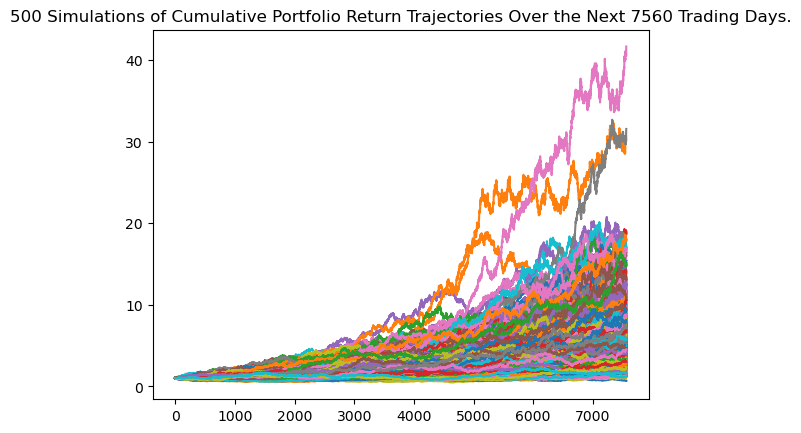

In [132]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
even_weight_line_plot = MC_even_weight.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

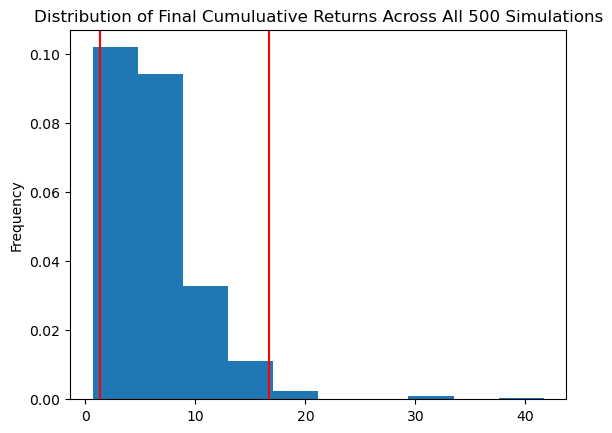

In [133]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
even_weight_distribution_plot = MC_even_weight.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [134]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
even_weight_table = MC_even_weight.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(even_weight_table)

count           500.000000
mean              6.394034
std               4.258538
min               0.675271
25%               3.583572
50%               5.431444
75%               8.087283
max              41.661697
95% CI Lower      1.328317
95% CI Upper     16.704398
Name: 7560, dtype: float64


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [135]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the members portfolio is ${total_stocks_bonds: .2f}")


The current balance of the stock and bond portion of the members portfolio is $ 65313.40


In [136]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(even_weight_table[8]*total_stocks_bonds)
ci_upper_thirty_cumulative_return = round(even_weight_table[9]*total_stocks_bonds)

# Print the result of your calculations
print(f"There is a 95% chance that the stock and bond portion (value of ${total_stocks_bonds: .2f}) of the portfolio"
      f" with a weight distribution of 60%/40% over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


There is a 95% chance that the stock and bond portion (value of $ 65313.40) of the portfolio with a weight distribution of 60%/40% over the next 30 years will end within in the range of $86757 and $1091021.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [137]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_year_weight = MCSimulation(
    portfolio_data = Montecarlo_df,
    weights = [.8,.2],
    num_simulation = 500,
    num_trading_days = 252*10
)


# Review the simulation input data
MC_ten_year_weight.portfolio_data.head()

SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2020-04-17 04:00:00+00:00  285.38  287.3000  282.40  286.54  146685294   
2020-04-20 04:00:00+00:00  282.61  286.7912  281.35  281.76  100109301   
2020-04-21 04:00:00+00:00  276.73  278.0400  272.02  273.17  126385698   
2020-04-22 04:00:00+00:00  278.35  281.0000  276.91  279.04   93524584   
2020-04-23 04:00:00+00:00  280.49  283.9400  278.75  279.01  104753796   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-04-17 04:00:00+00:00      699788  284.307868          NaN  117.52   
2020-04-20 04:00:00+00:00      600459  283.731259    -0.016682  117.15   
2020-04-21 04:00:00+00:00      923551  274.755317    -0.030487  117.43   
2020-04-22 04:00:00+00:00      527777  278.482513     0.021488  117.16   
2020-04-23 04:00:00+00:00      688622  280.966290    -0.000108  117.33   

                                                                         \
                             high      low   close   volume trade_count   
timestamp                                                                 
2020-04-17 04:00:00+00:00  117.62  117.035  117.25  4949824       25621   
2020-04-20 04:00:00+00:00  117.28  116.940  117.08  3847904       18508   
2020-04-21 04:00:00+00:00  117.44  117.070  117.14  4660507       19425   
2020-04-22 04:00:00+00:00  117.24  116.940  117.14  4647244       17538   
2020-04-23 04:00:00+00:00  117.45  117.190  117.42  4331115       18473   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-04-17 04:00:00+00:00  117.358347          NaN  
2020-04-20 04:00:00+00:00  117.030930    -0.001450  
2020-04-21 04:00:00+00:00  117.166762     0.000512  
2020-04-22 04:00:00+00:00  117.056879     0.000000  
2020-04-23 04:00:00+00:00  117.341656     0.002390

In [138]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year_weight.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 110.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 120.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 130.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 140.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 150.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 160.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 170.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 180.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 190.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 200.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 210.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 220.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 230.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 240.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 250.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 260.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 270.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 280.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 290.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 300.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 310.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 320.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 330.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 340.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 350.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 360.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 370.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 380.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 390.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 400.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 410.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 420.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 430.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 440.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 450.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 460.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 470.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 480.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

Running Monte Carlo simulation number 490.


C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Mo

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010956,1.018174,0.980205,1.015067,1.000224,0.993822,0.999029,1.004234,1.013357,0.989291,...,1.004811,0.990112,0.994264,1.004861,1.007202,1.004298,1.011800,1.010352,1.009531,1.003639
2,1.003097,1.018669,0.986354,1.002763,0.997663,0.992901,0.988006,1.009674,1.010776,0.979517,...,1.018227,0.992300,0.992897,1.003615,1.014651,1.013804,1.020632,1.005252,1.004871,1.002160
3,0.995036,1.030430,0.985628,1.006075,0.991087,0.995215,0.976404,1.006195,0.999434,0.980350,...,1.030527,0.987824,0.992148,0.997751,1.027931,1.003784,1.037718,0.992193,1.005295,0.991775
4,0.997501,1.032336,0.990428,0.996638,0.983663,0.987368,0.980052,1.001092,1.006448,0.972916,...,1.041515,0.990348,1.006853,0.978220,1.029559,1.007606,1.047685,1.008551,1.004780,0.998918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.362965,2.058965,2.794939,0.997954,1.375297,2.004567,2.888080,1.631905,3.873469,3.919749,...,2.508522,4.480321,2.183084,1.862752,5.293993,3.069992,1.118204,5.241411,2.065758,1.753282
2517,1.358131,2.104228,2.804745,1.005299,1.362700,1.982494,2.853815,1.623038,3.884801,3.984242,...,2.483419,4.528092,2.184947,1.880876,5.263407,3.098516,1.129431,5.251899,2.064731,1.770891
2518,1.351019,2.122817,2.799728,0.989731,1.358561,1.977276,2.871141,1.608174,3.906367,3.951421,...,2.494573,4.521963,2.188195,1.913515,5.219179,3.057982,1.129520,5.300863,2.075097,1.789052
2519,1.365047,2.111619,2.817207,0.987821,1.368979,1.975782,2.861813,1.603736,3.923548,3.916701,...,2.532407,4.488337,2.174867,1.921072,5.209055,3.059924,1.110452,5.303146,2.079394,1.820980


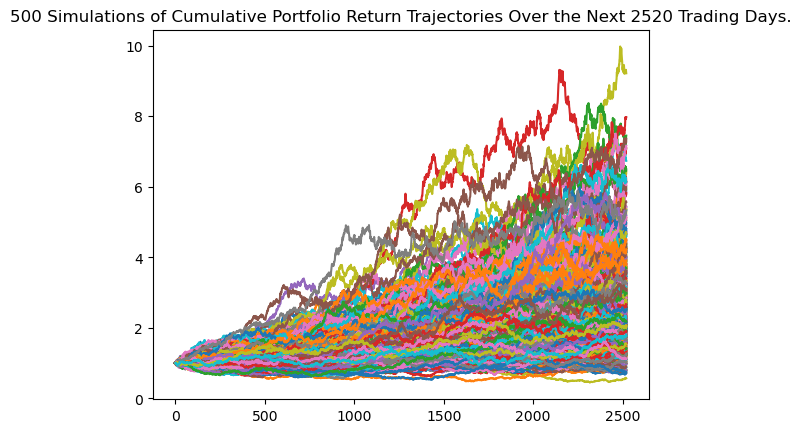

In [139]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
ten_year_line_plot = MC_ten_year_weight.plot_simulation()


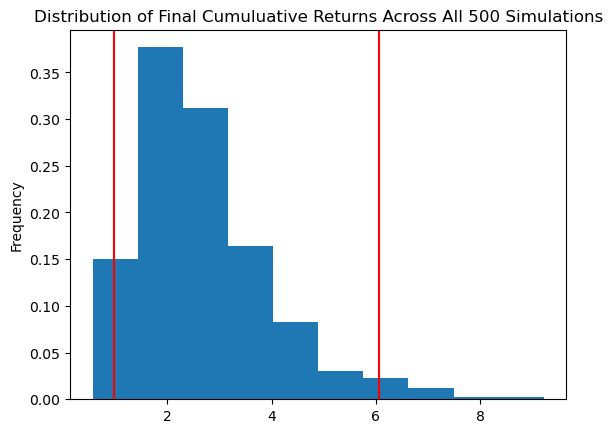

In [140]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_ten_year_distribution_plot = MC_ten_year_weight.plot_distribution()


In [141]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_ten_year_stats = MC_ten_year_weight.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
display(MC_ten_year_stats)

C:\Users\jhillman\OneDrive\Desktop\Fintech Bootcamp\Module-5-Financial-Simulations-and-APIs-\Challenge\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           500.000000
mean              2.678478
std               1.275487
min               0.569200
25%               1.775405
50%               2.445239
75%               3.247243
max               9.220115
95% CI Lower      0.982687
95% CI Upper      6.061072
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [142]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the members portfolio is ${total_stocks_bonds: .2f}")


The current balance of the stock and bond portion of the members portfolio is $ 65313.40


In [146]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_ten_year_stats[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_ten_year_stats[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that the stock and bond portion (value of ${total_stocks_bonds: .2f}) of the portfolio"
      f" with a weight distribution of 80%/20% over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")


There is a 95% chance that the stock and bond portion (value of $ 65313.40) of the portfolio with a weight distribution of 80%/20% over the next 10 years will end within in the range of $ 64182.66 and $ 395869.21.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?